###Projeto de Engenharia de Atributos e Redução de Váriaveis com Dados Médicos

In [1]:
# Importando as Libs

import numpy as np
import pandas as pd
!pip install -q powerbiclient
import powerbiclient
from powerbiclient.authentication import DeviceCodeLoginAuthentication
from powerbiclient import QuickVisualize, get_dataset_config
from google.colab import output
output.enable_custom_widget_manager()
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Funções

def convert_to_string(df, columns):
    for col in columns:
        df[col] = df[col].astype("string")


def convert_to_int(df, columns):
    for col in columns:
        df[col] = df[col].astype("int64")

In [3]:
# Carregando os dados

dados = '/content/diabetic_data.csv'

dataset = pd.read_csv (dados , sep = ',', na_values= ['Unknown/Invalid','','?'])

<ipython-input-3-34b15b3db99c>:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv (dados , sep = ',', na_values= ['Unknown/Invalid','','?'])


In [4]:
# Configurando máximo de coluna que pode aparecer 

pd.set_option ('display.max_columns', 100)

In [5]:
# Head no dataframe

dataset.head()




,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
# Shape

shape = dataset.shape 


In [7]:
# Informações das variáveis e tipagem dos dados

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101763 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [8]:
# Informações das estatisticas das variaveis quantitativas

dataset.describe (include= 'int64')

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [9]:
# Informações das estatisticas das variaveis qualitativas

dataset.describe (include= 'object')

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,99493,101763,101766,3197,61510,51817,101745,101408,100343,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,5,2,10,9,17,72,716,748,789,4,4,4,4,4,4,4,2,4,4,2,4,4,4,4,2,3,1,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,[70-80),[75-100),MC,InternalMedicine,428,276,250,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54708,26068,1336,32439,14635,6862,6752,11555,96420,84748,81778,100227,101063,101680,96575,101765,89080,91116,101743,94438,95401,101458,101728,101763,101727,101766,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


###Limpeza dos Dados / Engenharia de Atributo


In [10]:
# Verificando se há valores nulos

dataset.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          3
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

# Como podemos ver teoricamente não há valores nulos, porém como foi mostrado no head o caracter "?" ,logo ele representa a  ausencia de informação , com isso se configura em um valor nulo. Iremos aplicar outra função para quantificar esses valores nulos.

In [11]:
# Verificando a quantidade relativa valores nulos ("?") por varáveis

valores_na_percent = round(dataset.isin(['?']).sum()/shape[0]*100,0)
valores_na_percent


encounter_id                0.0
patient_nbr                 0.0
race                        0.0
gender                      0.0
age                         0.0
weight                      0.0
admission_type_id           0.0
discharge_disposition_id    0.0
admission_source_id         0.0
time_in_hospital            0.0
payer_code                  0.0
medical_specialty           0.0
num_lab_procedures          0.0
num_procedures              0.0
num_medications             0.0
number_outpatient           0.0
number_emergency            0.0
number_inpatient            0.0
diag_1                      0.0
diag_2                      0.0
diag_3                      0.0
number_diagnoses            0.0
max_glu_serum               0.0
A1Cresult                   0.0
metformin                   0.0
repaglinide                 0.0
nateglinide                 0.0
chlorpropamide              0.0
glimepiride                 0.0
acetohexamide               0.0
glipizide                   0.0
glyburid

#Variáveis com percent acima de 30%  serão dropadas (weight,payer_code,medical_specialty) , por haver um percent consideravel de valores nulos e não serem tão fundamental no nosso dataset.

In [12]:
# Dropando as colunas com 30%> de valores ausentes

dataset = dataset.drop( ['weight','payer_code','medical_specialty'], axis =1 )

In [13]:
# Removendo os registros das colunas que possuem valores ausentes abaixo de 30%
dataset = dataset.replace('?','')

In [14]:
dataset = dataset.dropna()

In [15]:
# Verificando a quantidade relativa valores nulos ("?") por varáveis
valores_na_percent = round(dataset.isin(['?']).sum()/shape[0]*100,0)
valores_na_percent

encounter_id                0.0
patient_nbr                 0.0
race                        0.0
gender                      0.0
age                         0.0
admission_type_id           0.0
discharge_disposition_id    0.0
admission_source_id         0.0
time_in_hospital            0.0
num_lab_procedures          0.0
num_procedures              0.0
num_medications             0.0
number_outpatient           0.0
number_emergency            0.0
number_inpatient            0.0
diag_1                      0.0
diag_2                      0.0
diag_3                      0.0
number_diagnoses            0.0
max_glu_serum               0.0
A1Cresult                   0.0
metformin                   0.0
repaglinide                 0.0
nateglinide                 0.0
chlorpropamide              0.0
glimepiride                 0.0
acetohexamide               0.0
glipizide                   0.0
glyburide                   0.0
tolbutamide                 0.0
pioglitazone                0.0
rosiglit

In [16]:
# Checamos se há variáveis que só tem um valor , se tiver iremos dropar essas constantes ('examide','citoglipton')


dataset.loc[:,dataset.nunique() == 1]

,examide,citoglipton,metformin-rosiglitazone
1,No,No,No
2,No,No,No
3,No,No,No
4,No,No,No
5,No,No,No
...,...,...,...
101761,No,No,No
101762,No,No,No
101763,No,No,No
101764,No,No,No


In [17]:
# Dropando as colunas com valores unicos 

dataset = dataset.drop( ['examide','citoglipton'], axis =1 )

In [18]:
# Shape

dataset.shape

(98052, 45)

###Engenharia de Atributo

In [19]:
dataset.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30


In [20]:
# Verificando os valores que aparecem na nossa varável target

dataset.value_counts(['readmitted'])

readmitted
NO            52337
>30           34649
<30           11066
dtype: int64

Vamos aplicar a técnica de binarização, 1 para readmitido e 0 para não readmitido

In [21]:
#Criando uma cópia do nosso datrafame

dataset_copy = dataset

In [22]:
# Fazendo o dê-para

dataset_copy['readmitted'] = dataset_copy['readmitted'].replace('>30',1)
dataset_copy['readmitted'] = dataset_copy['readmitted'].replace('<30',1)
dataset_copy['readmitted'] = dataset_copy['readmitted'].replace('NO',0)


In [23]:
# Verificando os valores que aparecem na nossa varável target após a transformação

dataset_copy.value_counts(['readmitted'])

readmitted
0             52337
1             45715
dtype: int64

<Axes: xlabel='age'>

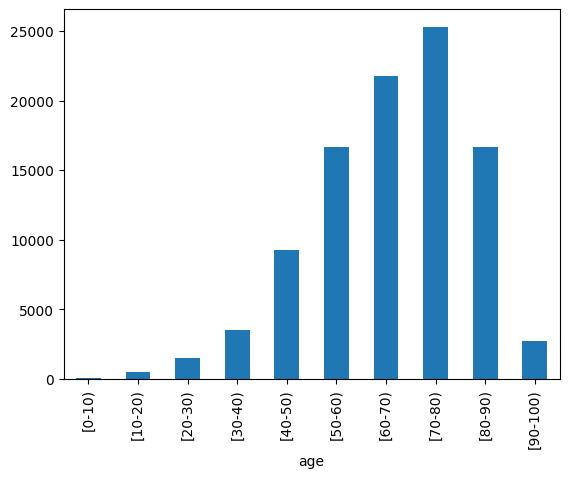

In [24]:
# Verificando os valores que aparecem na 'age'

dataset_copy.groupby('age').size().plot(kind = 'bar')

Para deixar a distribuição menos dispersa, iremos agrupar os dados começando da faixa etária de 0-50

In [25]:
dataset_copy.value_counts(['age'])

age     
[70-80)     25305
[60-70)     21809
[80-90)     16702
[50-60)     16697
[40-50)      9265
[30-40)      3548
[90-100)     2717
[20-30)      1478
[10-20)       466
[0-10)         65
dtype: int64

In [26]:
# Fazendo o dê-para

dataset_copy['age'] = dataset_copy['age'].replace('[0-10)','[0-50)')
dataset_copy['age'] = dataset_copy['age'].replace('[10-20)','[0-50)')
dataset_copy['age'] = dataset_copy['age'].replace('[20-30)','[0-50)')
dataset_copy['age'] = dataset_copy['age'].replace('[30-40)','[0-50)')
dataset_copy['age'] = dataset_copy['age'].replace('[40-50)','[0-50)')



In [27]:
dataset_copy.value_counts(['age'])

age     
[70-80)     25305
[60-70)     21809
[80-90)     16702
[50-60)     16697
[0-50)      14822
[90-100)     2717
dtype: int64

<Axes: xlabel='age'>

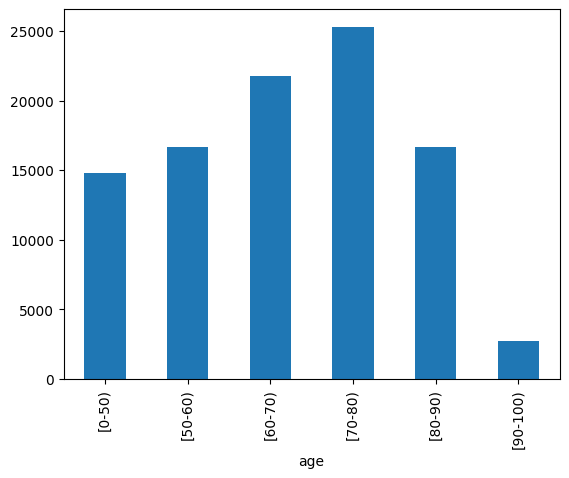

In [28]:
# Verificando os valores que aparecem na 'age' após a transformação

dataset_copy.groupby('age').size().plot(kind = 'bar')

In [29]:
# Verificando os valores que aparecem na  varável 'admission_type_id'
dataset_copy.value_counts(['admission_type_id'])

admission_type_id
1                    52178
3                    18193
2                    17543
6                     5135
5                     4661
8                      312
7                       20
4                       10
dtype: int64

Iremos reduzir os níveis dessa variavel somente para 2 níveis (Emergencia e Outros)

In [30]:
# Fazendo o dê-para

dataset_copy['admission_type_id'] = dataset_copy['admission_type_id'].replace(1,'Emergencia')
dataset_copy['admission_type_id'] = dataset_copy['admission_type_id'].replace(2,'Outro')
dataset_copy['admission_type_id'] = dataset_copy['admission_type_id'].replace(3,'Outro')
dataset_copy['admission_type_id'] = dataset_copy['admission_type_id'].replace(4,'Outro')
dataset_copy['admission_type_id'] = dataset_copy['admission_type_id'].replace(5,'Outro')
dataset_copy['admission_type_id'] = dataset_copy['admission_type_id'].replace(6,'Outro')
dataset_copy['admission_type_id'] = dataset_copy['admission_type_id'].replace(7,'Outro')
dataset_copy['admission_type_id'] = dataset_copy['admission_type_id'].replace(8,'Outro')


In [31]:
# Verificando os valores que aparecem na  varável 'admission_type_id' após a transformação
dataset_copy.value_counts(['admission_type_id'])

admission_type_id
Emergencia           52178
Outro                45874
dtype: int64

In [32]:
# Verificando os valores que aparecem na  varável 'discharge_disposition_id'
dataset_copy.value_counts(['discharge_disposition_id'])

discharge_disposition_id
1                           57609
3                           13564
6                           12626
18                           3624
2                            2049
22                           1970
11                           1606
5                            1127
25                            941
4                             756
7                             592
23                            400
13                            396
14                            368
28                            137
8                             106
15                             63
24                             48
9                              21
17                             14
16                             11
19                              8
10                              6
27                              5
12                              3
20                              2
dtype: int64

In [33]:
dataset_copy.discharge_disposition_id.unique()

array([ 1,  3,  6,  2,  5, 11,  7, 25, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27])

Iremos reduzir os níveis dessa variavel somente para 2 níveis (Casa e Outro)

In [34]:
# Fazendo o dê-para

dataset_copy['discharge_disposition_id'] = dataset_copy['discharge_disposition_id'].replace(1,'Casa')
dataset_copy['discharge_disposition_id'] = dataset_copy['discharge_disposition_id'].replace(25,'Outro')
dataset_copy['discharge_disposition_id'] = dataset_copy['discharge_disposition_id'].replace(6,'Outro')
dataset_copy['discharge_disposition_id'] = dataset_copy['discharge_disposition_id'].replace(2,'Outro')
dataset_copy['discharge_disposition_id'] = dataset_copy['discharge_disposition_id'].replace(5,'Outro')
dataset_copy['discharge_disposition_id'] = dataset_copy['discharge_disposition_id'].replace(11,'Outro')
dataset_copy['discharge_disposition_id'] = dataset_copy['discharge_disposition_id'].replace(7,'Outro')
dataset_copy['discharge_disposition_id'] = dataset_copy['discharge_disposition_id'].replace(10,'Outro')
dataset_copy['discharge_disposition_id'] = dataset_copy['discharge_disposition_id'].replace(4,'Outro')
dataset_copy['discharge_disposition_id'] = dataset_copy['discharge_disposition_id'].replace(14,'Outro')
dataset_copy['discharge_disposition_id'] = dataset_copy['discharge_disposition_id'].replace(18,'Outro')
dataset_copy['discharge_disposition_id'] = dataset_copy['discharge_disposition_id'].replace(8,'Outro')
dataset_copy['discharge_disposition_id'] = dataset_copy['discharge_disposition_id'].replace(13,'Outro')
dataset_copy['discharge_disposition_id'] = dataset_copy['discharge_disposition_id'].replace(12,'Outro')
dataset_copy['discharge_disposition_id'] = dataset_copy['discharge_disposition_id'].replace(16,'Outro')
dataset_copy['discharge_disposition_id'] = dataset_copy['discharge_disposition_id'].replace(17,'Outro')
dataset_copy['discharge_disposition_id'] = dataset_copy['discharge_disposition_id'].replace(22,'Outro')
dataset_copy['discharge_disposition_id'] = dataset_copy['discharge_disposition_id'].replace(23,'Outro')
dataset_copy['discharge_disposition_id'] = dataset_copy['discharge_disposition_id'].replace(9,'Outro')
dataset_copy['discharge_disposition_id'] = dataset_copy['discharge_disposition_id'].replace(20,'Outro')
dataset_copy['discharge_disposition_id'] = dataset_copy['discharge_disposition_id'].replace(15,'Outro')
dataset_copy['discharge_disposition_id'] = dataset_copy['discharge_disposition_id'].replace(24,'Outro')
dataset_copy['discharge_disposition_id'] = dataset_copy['discharge_disposition_id'].replace(28,'Outro')
dataset_copy['discharge_disposition_id'] = dataset_copy['discharge_disposition_id'].replace(19,'Outro')
dataset_copy['discharge_disposition_id'] = dataset_copy['discharge_disposition_id'].replace(27,'Outro')
dataset_copy['discharge_disposition_id'] = dataset_copy['discharge_disposition_id'].replace(3,'Outro')

#Poderiamos criar um loop

#dataset_copy['discharge_disposition_id'] = pd.Series(['Casa' if val == 1 else 'Outro' for val in dados ['discharge_disposition_id']], index = dados.index)


In [35]:
dataset_copy.discharge_disposition_id.unique()


array(['Casa', 'Outro'], dtype=object)

In [36]:
# Verificando os valores que aparecem na  varável 'admission_source_id'
dataset_copy.value_counts(['admission_source_id'])




admission_source_id
7                      55951
1                      28355
17                      6602
4                       2945
6                       1893
2                       1031
5                        846
3                        179
20                       160
9                         49
8                         15
22                        12
10                         7
11                         2
14                         2
25                         2
13                         1
dtype: int64

Iremos reduzir os níveis dessa variavel somente para 3 níveis (Sala_Emergencia, Recomendacao e Outro)

In [37]:
# Fazendo o dê-para

dataset_copy['admission_source_id'] = dataset_copy['admission_source_id'].replace(7,'Sala_Emergencia')
dataset_copy['admission_source_id'] = dataset_copy['admission_source_id'].replace(1,'Recomendacao')
dataset_copy['admission_source_id'] = dataset_copy['admission_source_id'].replace(17,'Outro')
dataset_copy['admission_source_id'] = dataset_copy['admission_source_id'].replace(4,'Outro')
dataset_copy['admission_source_id'] = dataset_copy['admission_source_id'].replace(6,'Outro')
dataset_copy['admission_source_id'] = dataset_copy['admission_source_id'].replace(2,'Outro')
dataset_copy['admission_source_id'] = dataset_copy['admission_source_id'].replace(5,'Outro')
dataset_copy['admission_source_id'] = dataset_copy['admission_source_id'].replace(3,'Outro')
dataset_copy['admission_source_id'] = dataset_copy['admission_source_id'].replace(20,'Outro')
dataset_copy['admission_source_id'] = dataset_copy['admission_source_id'].replace(9,'Outro')
dataset_copy['admission_source_id'] = dataset_copy['admission_source_id'].replace(8,'Outro')
dataset_copy['admission_source_id'] = dataset_copy['admission_source_id'].replace(22,'Outro')
dataset_copy['admission_source_id'] = dataset_copy['admission_source_id'].replace(10,'Outro')
dataset_copy['admission_source_id'] = dataset_copy['admission_source_id'].replace(11,'Outro')
dataset_copy['admission_source_id'] = dataset_copy['admission_source_id'].replace(14,'Outro')
dataset_copy['admission_source_id'] = dataset_copy['admission_source_id'].replace(25,'Outro')
dataset_copy['admission_source_id'] = dataset_copy['admission_source_id'].replace(13,'Outro')


In [38]:
# Verificando os valores que aparecem na  varável 'admission_source_id' após a trnasformação
dataset_copy.value_counts(['admission_source_id'])

admission_source_id
Sala_Emergencia        55951
Recomendacao           28355
Outro                  13746
dtype: int64

Com a requisição da área de negocio : Houve ou não mudança na dosagem dos medicamentos ministrados? Qual a frequência dessas mudanças e quantos medicamentos foram utilizado em um determinado paciente?

Com isso iremos agrupar essas mais de 23 variaveis de medicamentos, criando duas (2) novas colunas num_alt_dosagem, num_med.

In [39]:
dataset_copy.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [40]:
# Lista com os nomes das variáveis de medicamentos (3 variáveis já tinham sido removidas)
medicamentos = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 
                'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 
                'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
                'glimepiride-pioglitazone', 'metformin-pioglitazone', 'metformin-rosiglitazone']

In [41]:
# Loop para ajustar o valor das variáveis
for col in medicamentos:
    if col in dataset_copy.columns:
        colname = str(col) + 'temp'
        dataset_copy[colname] = dataset_copy[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)

In [42]:
# Cria uma variável para receber a contagem por paciente
dataset_copy['num_alt_dosagem_med'] = 0

In [43]:
# Contagem de modificações na dosagem de medicamentos
for col in medicamentos:
    if col in dataset_copy.columns:
        colname = str(col) + 'temp'
        dataset_copy['num_alt_dosagem_med'] = dataset_copy['num_alt_dosagem_med'] + dataset_copy[colname]
        del dataset_copy[colname]

In [44]:
# Verifica o total por modificações na dosagem de medicamentos
dataset_copy.num_alt_dosagem_med.value_counts()

0    71309
1    25350
2     1281
3      107
4        5
Name: num_alt_dosagem_med, dtype: int64

In [45]:
dataset_copy.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,num_alt_dosagem_med
1,149190,55629189,Caucasian,Female,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,0
3,500364,82442376,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0,1
4,16680,42519267,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0,0
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,1,0


Vamos alterar o valor das colunas dos medicamentos para refletir se esse medicamento está sendo administrado a um paciente ou não.

In [46]:
# Recoding das colunas de medicamentos
for col in medicamentos:
    if col in dataset_copy.columns:
        dataset_copy[col] = dataset_copy[col].replace('No', 0)
        dataset_copy[col] = dataset_copy[col].replace('Steady', 1)
        dataset_copy[col] = dataset_copy[col].replace('Up', 1)
        dataset_copy[col] = dataset_copy[col].replace('Down', 1) 

In [47]:
# Variável com a contagem de medicamentos por paciente
dataset_copy['num_med'] = 0


In [48]:
# Carregamos a nova variável
for col in medicamentos:
    if col in dataset_copy.columns:
        dataset_copy['num_med'] = dataset_copy['num_med'] + dataset_copy[col]

In [49]:
# Verifica o total de medicamentos
dataset_copy['num_med'].value_counts()

1    45447
0    22702
2    21056
3     7485
4     1300
5       57
6        5
Name: num_med, dtype: int64

Depois de criar essas duas colunas, podemos remover as colunas dos medicamentos.

In [50]:
# Remove as colunas de medicamentos
dataset_copy = dataset_copy.drop(columns = medicamentos)

In [51]:
# Shape
dataset_copy.shape

(98052, 26)

In [52]:
dataset_copy.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,num_alt_dosagem_med,num_med
1,149190,55629189,Caucasian,Female,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,0,18,0,0,0,276,250.01,255,9,None,None,Ch,Yes,1,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,Yes,0,0,1
3,500364,82442376,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,1,16,0,0,0,8,250.43,403,7,None,None,Ch,Yes,0,1,1
4,16680,42519267,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,0,8,0,0,0,197,157,250,5,None,None,Ch,Yes,0,0,2
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,6,16,0,0,0,414,411,250,9,None,None,No,Yes,1,0,1


In [53]:
# Variáveis
dataset_copy.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
change                      object
diabetesMed                 object
readmitted                   int64
num_alt_dosagem_med          int64
num_med                      int64
dtype: object

In [54]:
dataset_copy.shape

(98052, 26)

In [55]:
dataset_copy.max_glu_serum.unique() #Fazer a binarizacao nessa variavel

array(['None', '>300', 'Norm', '>200'], dtype=object)

In [56]:
# Fazendo o dê-para
dataset_copy['max_glu_serum'] = dataset_copy['max_glu_serum'].replace('None',-99)
dataset_copy['max_glu_serum'] = dataset_copy['max_glu_serum'].replace('>300',0)
dataset_copy['max_glu_serum'] = dataset_copy['max_glu_serum'].replace('>200',0)
dataset_copy['max_glu_serum'] = dataset_copy['max_glu_serum'].replace('Norm',1)

In [57]:
# Verificando os valores que aparecem na  varável 'max_glu_serum' após a trnasformação
dataset_copy.value_counts(['max_glu_serum'])#A Variavel será dropada pois há muitos valores ausentes

max_glu_serum
-99              92844
 0                2676
 1                2532
dtype: int64

In [58]:
dataset_copy.A1Cresult.unique() #Fazer a binarizacao nessa variavel

array(['None', '>7', '>8', 'Norm'], dtype=object)

In [59]:
# Fazendo o dê-para
dataset_copy['A1Cresult'] = dataset_copy['A1Cresult'].replace('None',-99)
dataset_copy['A1Cresult'] = dataset_copy['A1Cresult'].replace('>7',0)
dataset_copy['A1Cresult'] = dataset_copy['A1Cresult'].replace('>8',0)
dataset_copy['A1Cresult'] = dataset_copy['A1Cresult'].replace('Norm',1)

In [60]:
# Verificando os valores que aparecem na  varável 'max_glu_serum' após a trnasformação
dataset_copy.value_counts(['A1Cresult']) #A Variavel será dropada pois há muitos valores ausentes

A1Cresult
-99          81859
 0           11339
 1            4854
dtype: int64

In [61]:
dataset_copy.change.unique() #Fazer a binarizacao nessa variavel

array(['Ch', 'No'], dtype=object)

In [62]:
# Fazendo o dê-para
dataset_copy['change'] = dataset_copy['change'].replace('No',0)
dataset_copy['change'] = dataset_copy['change'].replace('Ch',1)

In [63]:
dataset_copy.value_counts(['change'])

change
0         52774
1         45278
dtype: int64

In [64]:
dataset_copy.diabetesMed.unique() #Fazer a binarizacao nessa variavel

array(['Yes', 'No'], dtype=object)

In [65]:
# Fazendo o dê-para
dataset_copy['diabetesMed'] = dataset_copy['diabetesMed'].replace('No',0)
dataset_copy['diabetesMed'] = dataset_copy['diabetesMed'].replace('Yes',1)

In [66]:
dataset_copy.value_counts(['diabetesMed'])

diabetesMed
1              75350
0              22702
dtype: int64

In [67]:
# Dropar diag_1,2,3
# Dropar max_glu_serum
# Dropar A1Cresult
colunas_drop = ['diag_1','diag_2','diag_3','max_glu_serum','A1Cresult']
# Remove as colunas 
dataset_copy = dataset_copy.drop(columns = colunas_drop)

In [68]:
# Variáveis
dataset_copy.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
number_diagnoses             int64
change                       int64
diabetesMed                  int64
readmitted                   int64
num_alt_dosagem_med          int64
num_med                      int64
dtype: object

In [69]:
dataset_copy.shape

(98052, 21)

In [70]:
dataset_copy.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,num_alt_dosagem_med,num_med
1,149190,55629189,Caucasian,Female,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,0,18,0,0,0,9,1,1,1,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,5,13,2,0,1,6,0,1,0,0,1
3,500364,82442376,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,1,16,0,0,0,7,1,1,0,1,1
4,16680,42519267,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,0,8,0,0,0,5,1,1,0,0,2
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,6,16,0,0,0,9,0,1,1,0,1


###Convertendo os tipos de dados das variáveis

In [71]:
# Variáveis
dataset_copy.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
number_diagnoses             int64
change                       int64
diabetesMed                  int64
readmitted                   int64
num_alt_dosagem_med          int64
num_med                      int64
dtype: object

In [72]:
# Convertendo para String

convert_to_string(dataset_copy, ['patient_nbr','encounter_id','race', 'gender','age','admission_type_id','discharge_disposition_id','admission_source_id','change','diabetesMed','readmitted'])

In [73]:
# Retornando o dataset_copy para dataset
dataset = dataset_copy

###Usando o PowerBI para visualização dos dados

In [ ]:
#Logando na conta

device_auth = DeviceCodeLoginAuthentication()

Performing device flow authentication. Please follow the instructions below.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code RVEEEXP9E to authenticate.


In [ ]:
# Criando um Dashboard com o dataset
PBI_visualize = QuickVisualize(get_dataset_config(dataset), auth=device_auth)

In [ ]:
# Configurando o tamanho do Dashboard
PBI_visualize.set_size(700, 1850)
          
                    

In [ ]:
# Visualizando o Dashboard
PBI_visualize

###***Análise Descritiva dos Dados***

In [ ]:
# Head

dataset.head()

## Total de Medicamentos Consumidos por Faixa Etária

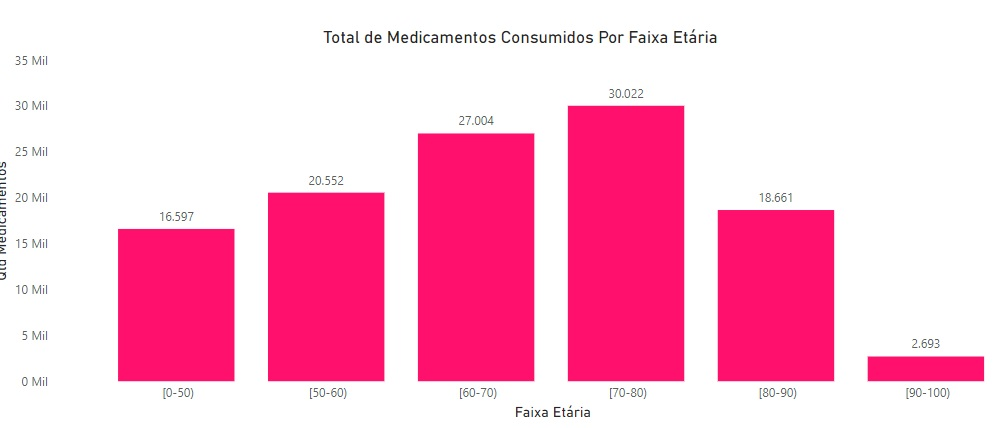

Chegamos a conclusão que a faixa que mais consumiu médicamentos com aproximadamente (30.000 unidades) foi a de 70 - 80 Anos.

*texto em itálico*#Total de Readmições por Gênero

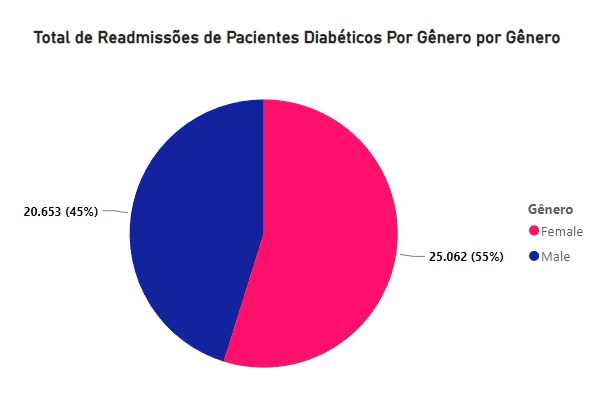

Podemos ver que o gênero feminino foi o que houve mais readmissões, cerca de 5% a mais que o masculino

#Total de Readmissões de Pacientes Por Faixa Etária

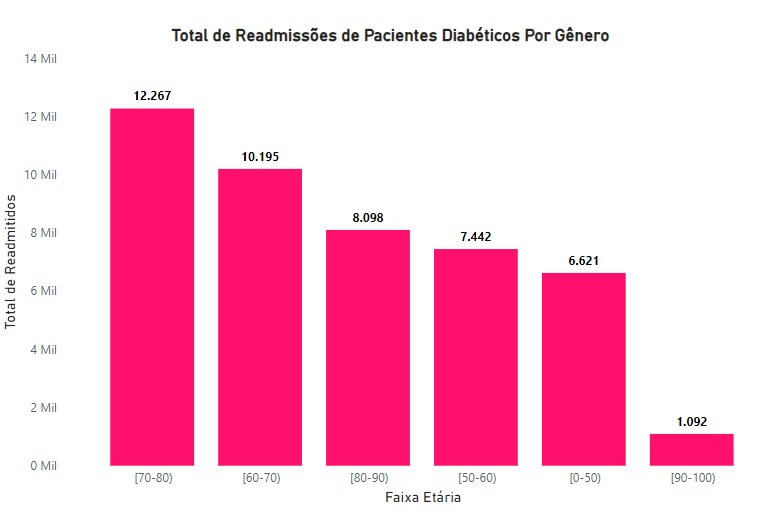

#Percentual de Readmissões/Não Readmissões de Pacientes Por Faixa Etária

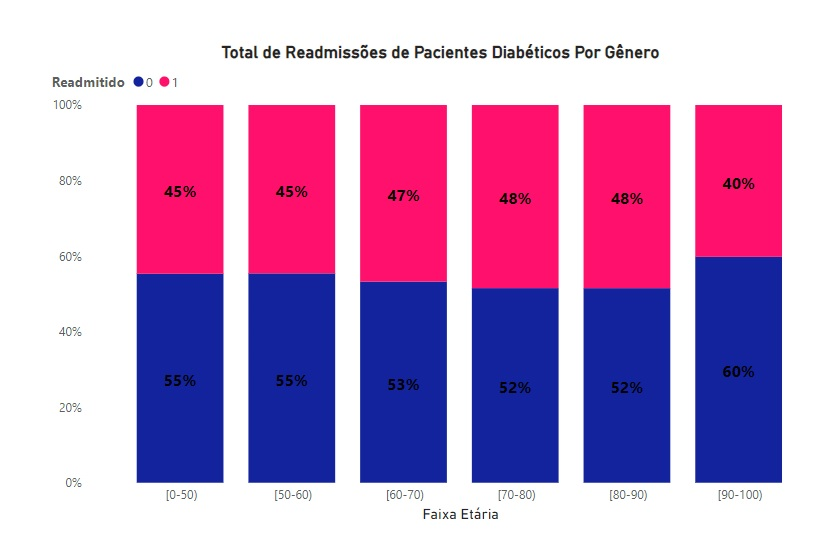

Onde '0' significa não readmitido e o '1' readmitido

#Total de Readmissões de Pacientes Por Gênero, Por Idade e Por Tipo de Admissão

Emergência

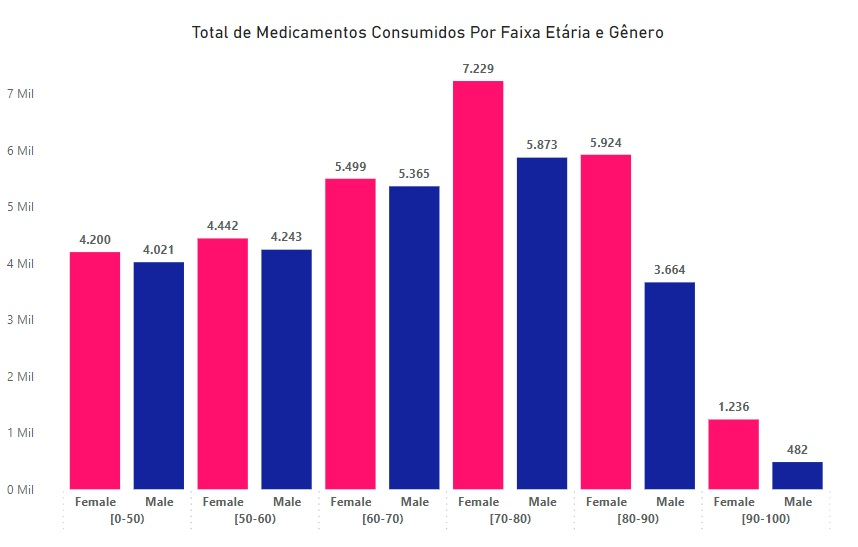

Outro

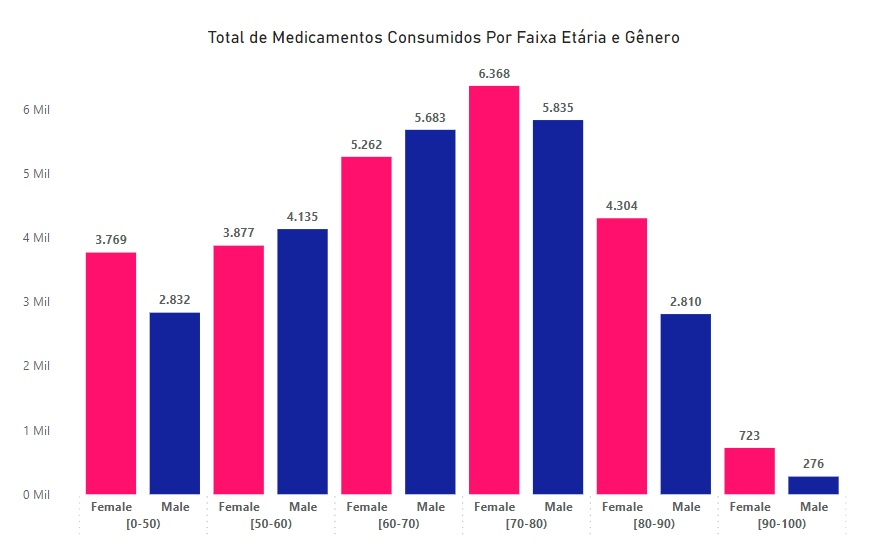

###Fim